In [56]:
import pandas as pd
import numpy as np
from hazem_doc2vec.helper_functions import in_pickle, out_pickle
import data_analysis.preprocessor_end as pre
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sn
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [57]:
def precision(tp, fp): return tp / (tp + fp)
def recall(tp, fn): return tp / (tp + fn)
def f1_score(precision, recall): return 2 * ((precision * recall) / (precision + recall))
def accuracy(tp, fp, tn, fn): return (tp + tn) / (tp + fp + fn + tn)

In [27]:
%%time
X = in_pickle('data/X')     
Y = in_pickle('data/Y')     

CPU times: user 8.58 ms, sys: 28 µs, total: 8.61 ms
Wall time: 25.6 ms


In [54]:
%%time
# of the form [ [[vec_1], label_1], ..]
pos_docs = []
neg_docs = []

for i in range(len(X)):
    if Y[i] == 0:
        neg_docs.append([X[i], 0])
    else: 
        pos_docs.append([X[i], 1])

pos_num = len(pos_docs)
neg_num = len(neg_docs)
total = pos_num + neg_num

print("Number of positive docs: ", pos_num)
print("Number of negative docs: ", neg_num)
print("Percentage of positive docs: ", pos_num / total)
print("Percentage of negative docs: ", neg_num / total)


Number of positive docs:  1573
Number of negative docs:  4721
Percentage of positive docs:  0.24992055926278997
Percentage of negative docs:  0.75007944073721
CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 9.68 ms


In [81]:
%%time
train_pos = list(pos_docs)
train_neg = []
i = 0
for i in range(len(train_pos)):
    train_neg.append(neg_docs[i])

test = neg_docs[i:]

print("# of test docs: ", len(test))
print("# of train docs", 2 * len(train_pos))

# of test docs:  3149
# of train docs 3146
CPU times: user 1.01 ms, sys: 54 µs, total: 1.06 ms
Wall time: 997 µs


In [99]:
%%time
temp_train_x = train_neg + train_pos

random.shuffle(temp_train_x)

# train doc vectors
train_x = np.empty([len(temp_train_x), 300], dtype=np.float)
# train labels
train_y = np.empty(len(temp_train_x), dtype=np.int)
for i in range(len(temp_train_x)):
    train_x[i] = temp_train_x[i][0]     # vector
    train_y[i] = temp_train_x[i][1]     # label


test_x = np.empty([len(test), 300], dtype=np.float)     # vectors
test_y = np.empty(len(test), dtype=np.int)              # labels
for i in range(len(test)):
    test_x[i] = test[i][0]
    test_y[i] = test[i][1]


CPU times: user 17.6 ms, sys: 16 ms, total: 33.5 ms
Wall time: 31.8 ms


In [58]:
%%time
train_x = in_pickle('data/sec_approach/train_x')
train_y = in_pickle('data/sec_approach/train_y')
test_x = in_pickle('data/sec_approach/test_x')
test_y = in_pickle('data/sec_approach/test_y')

CPU times: user 8.66 ms, sys: 19.9 ms, total: 28.5 ms
Wall time: 36.3 ms


In [59]:
%%time
clf = SVC(C=20, gamma=0.001, probability=True)
clf.fit(train_x, train_y)

CPU times: user 40.9 s, sys: 114 ms, total: 41 s
Wall time: 42.3 s


In [60]:
%%time
y_pred = clf.predict(test_x)
conf_mat = confusion_matrix(test_y, y_pred)
print(conf_mat)


[[ 524 2625]
 [   0    0]]
CPU times: user 5.79 s, sys: 0 ns, total: 5.79 s
Wall time: 5.94 s


In [61]:
%%time
tn, fp, fn, tp = conf_mat.ravel()
precision = precision(tp, fp)
recall = recall(tp, fn)
f1_score = f1_score(precision, recall)
accuracy = accuracy(tp, fp, tn, fn)

CPU times: user 2.11 ms, sys: 0 ns, total: 2.11 ms
Wall time: 3.75 ms


In [63]:
(tn, fp, fn, tp)

(524, 2625, 0, 0)

In [67]:
(precision, recall, f1_score, accuracy)


(0.0, nan, nan, 0.1664020323912353)

In [68]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29      3149
           1       0.00      0.00      0.00         0

   micro avg       0.17      0.17      0.17      3149
   macro avg       0.50      0.08      0.14      3149
weighted avg       1.00      0.17      0.29      3149



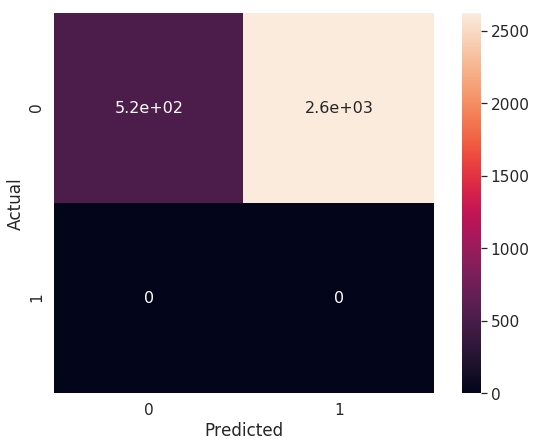

In [69]:
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(df_cm)
plt.savefig('2_approach_15_folds.png')